<a href="https://colab.research.google.com/github/Alice188912/Alice188912/blob/main/03_dhsi_pre_trained_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[readings](https://via.hypothes.is/https://dhsi2022.jonreeve.com/static/readings/kozlowski.pdf)

[lecture videos](https://tubedu.org/videos/watch/ac781240-2c94-477b-a413-0c15b0bba193)

In [1]:
import spacy
import pandas as pd
from sklearn.decomposition import PCA
# new data visualization library
import plotly.express as px

In [2]:
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [3]:
nlp = spacy.load("en_core_web_lg")

In [4]:
import nltk
from nltk.corpus import gutenberg,brown

In [5]:
nltk.download("brown")

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [6]:
nltk.download("gutenberg")

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [7]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [8]:
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [9]:
brownRaw = [' '.join(brown.words(categories = cat))[:100000] for cat in brown.categories()]
# go through all the categories above, for each category show all the words in that category, separate with spaces

In [10]:
[len(text) for text in brownRaw]

[100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 72153]

In [11]:
for cat,text in zip (brown.categories(),brownRaw):
  print (cat, "...", text[:200])
  # get both category name and texts inside

adventure ... Dan Morgan told himself he would forget Ann Turner . He was well rid of her . He certainly didn't want a wife who was fickle as Ann . If he had married her , he'd have been asking for trouble . But al
belles_lettres ... Northern liberals are the chief supporters of civil rights and of integration . They have also led the nation in the direction of a welfare state . And both in their objectives of non-discrimination a
editorial ... Assembly session brought much good The General Assembly , which adjourns today , has performed in an atmosphere of crisis and struggle from the day it convened . It was faced immediately with a showdo
fiction ... Thirty-three Scotty did not go back to school . His parents talked seriously and lengthily to their own doctor and to a specialist at the University Hospital -- Mr. McKinley was entitled to a discount
government ... The Office of Business Economics ( OBE ) of the U.S. Department of Commerce provides basic measures of the national econom

In [12]:
brownDocs = [nlp(text) for text in brownRaw]

In [13]:
brownVecs = pd.DataFrame([doc.vector for doc in brownDocs])

In [14]:
pca = PCA(n_components = 3)

In [15]:
pcaOut = pd.DataFrame(pca.fit_transform(brownVecs))

In [16]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [17]:
pcaOut
# 14 categories (rows) and three dimensions (x, y, z)

,0,1,2
0,-0.472891,0.087374,-0.124207
1,0.124515,-0.089173,0.123781
2,0.181946,-0.226939,-0.022680
3,-0.407302,0.024488,-0.032407
4,0.612282,-0.275146,-0.118059
5,0.226820,0.165380,-0.023539
6,-0.249113,0.009430,0.062657
7,0.751351,0.562534,-0.070572
8,0.031267,0.026904,0.071498
9,-0.483291,0.079048,-0.164881


In [18]:
px.scatter_3d(pcaOut, x=0, y=1, z=2, text=brown.categories())

In [19]:
gutenbergRaw = [gutenberg.raw(fid)[:200000] for fid in gutenberg.fileids()]

In [20]:
[len(text) for text in gutenbergRaw]

[200000,
 200000,
 200000,
 200000,
 38153,
 200000,
 84663,
 144395,
 200000,
 200000,
 200000,
 200000,
 200000,
 200000,
 112310,
 162881,
 100351,
 200000]

In [21]:
gutenbergVecs = [nlp(text).vector for text in gutenbergRaw]

In [ ]:
brownVecs['label']= brown.categories()
brownVecs

In [ ]:
brownVecs['color'] = "r"
brownVecs

In [24]:
gutenbergVecsDf = pd.DataFrame(gutenbergVecs)

In [25]:
gutenbergVecsDf

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.017257,0.188744,-0.151862,-0.065255,0.080230,0.004933,0.027246,-0.123728,-0.067178,2.093705,...,-0.145755,0.041460,-0.008494,-0.031870,0.053964,0.004416,-0.009470,-0.034633,0.003067,0.025103
1,-0.000062,0.172396,-0.134776,-0.066381,0.069227,0.002448,0.016792,-0.106079,-0.064603,2.148410,...,-0.158291,0.036392,0.003101,-0.020889,0.017109,0.013108,-0.007259,-0.030607,-0.007598,0.018043
2,-0.003238,0.181489,-0.143779,-0.061830,0.080936,-0.003044,0.018280,-0.110631,-0.074815,2.102778,...,-0.147233,0.031360,0.000899,-0.022932,0.036530,0.004773,-0.014230,-0.021316,-0.003748,0.023325
3,0.001945,0.108354,-0.085510,-0.137732,0.072198,-0.054195,0.044823,-0.078105,-0.099428,1.992683,...,-0.176710,-0.005729,-0.032493,-0.015427,-0.061844,0.012353,0.048831,0.053624,-0.031213,-0.008841
4,0.006234,0.136865,-0.109430,-0.075929,0.086357,-0.029823,0.027223,-0.038375,-0.083382,1.833877,...,-0.174802,0.006932,0.004553,-0.043459,-0.048804,0.049106,0.038717,0.025313,-0.025537,0.021950
5,0.001907,0.168638,-0.142626,-0.077383,0.100971,0.002682,-0.006426,-0.101056,-0.072827,2.104329,...,-0.172815,0.023449,0.033289,-0.039976,-0.005217,0.010048,0.011779,0.015973,0.007350,0.029476
6,-0.031983,0.165656,-0.154858,-0.091357,0.094554,0.033653,-0.016142,-0.115313,-0.060703,2.137341,...,-0.161525,0.027858,0.003337,-0.044719,0.023765,0.018002,0.000443,0.000668,0.027335,0.040381
7,-0.013928,0.192648,-0.136675,-0.073410,0.104906,0.015659,0.024501,-0.113112,-0.079146,2.049926,...,-0.134730,0.023521,0.022304,-0.043726,0.019459,-0.015362,-0.059656,0.005836,0.028249,0.052318
8,-0.003061,0.146416,-0.129247,-0.072411,0.102184,-0.006835,0.000574,-0.053749,-0.066777,2.011129,...,-0.162745,0.015799,0.019809,-0.048712,-0.013152,0.029939,-0.009230,0.015138,0.001699,0.033017
9,0.001777,0.147157,-0.133762,-0.063736,0.105076,-0.003176,0.000478,-0.081493,-0.065867,2.024487,...,-0.156347,0.018110,0.028263,-0.046816,-0.007590,0.034077,0.005253,0.013511,0.007183,0.034974


In [26]:
gutenbergVecsDf["label"] = gutenberg.fileids()

In [27]:
gutenbergVecsDf['color'] = 'b'
gutenbergVecsDf

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,label,color
0,-0.017257,0.188744,-0.151862,-0.065255,0.080230,0.004933,0.027246,-0.123728,-0.067178,2.093705,...,-0.008494,-0.031870,0.053964,0.004416,-0.009470,-0.034633,0.003067,0.025103,austen-emma.txt,b
1,-0.000062,0.172396,-0.134776,-0.066381,0.069227,0.002448,0.016792,-0.106079,-0.064603,2.148410,...,0.003101,-0.020889,0.017109,0.013108,-0.007259,-0.030607,-0.007598,0.018043,austen-persuasion.txt,b
2,-0.003238,0.181489,-0.143779,-0.061830,0.080936,-0.003044,0.018280,-0.110631,-0.074815,2.102778,...,0.000899,-0.022932,0.036530,0.004773,-0.014230,-0.021316,-0.003748,0.023325,austen-sense.txt,b
3,0.001945,0.108354,-0.085510,-0.137732,0.072198,-0.054195,0.044823,-0.078105,-0.099428,1.992683,...,-0.032493,-0.015427,-0.061844,0.012353,0.048831,0.053624,-0.031213,-0.008841,bible-kjv.txt,b
4,0.006234,0.136865,-0.109430,-0.075929,0.086357,-0.029823,0.027223,-0.038375,-0.083382,1.833877,...,0.004553,-0.043459,-0.048804,0.049106,0.038717,0.025313,-0.025537,0.021950,blake-poems.txt,b
5,0.001907,0.168638,-0.142626,-0.077383,0.100971,0.002682,-0.006426,-0.101056,-0.072827,2.104329,...,0.033289,-0.039976,-0.005217,0.010048,0.011779,0.015973,0.007350,0.029476,bryant-stories.txt,b
6,-0.031983,0.165656,-0.154858,-0.091357,0.094554,0.033653,-0.016142,-0.115313,-0.060703,2.137341,...,0.003337,-0.044719,0.023765,0.018002,0.000443,0.000668,0.027335,0.040381,burgess-busterbrown.txt,b
7,-0.013928,0.192648,-0.136675,-0.073410,0.104906,0.015659,0.024501,-0.113112,-0.079146,2.049926,...,0.022304,-0.043726,0.019459,-0.015362,-0.059656,0.005836,0.028249,0.052318,carroll-alice.txt,b
8,-0.003061,0.146416,-0.129247,-0.072411,0.102184,-0.006835,0.000574,-0.053749,-0.066777,2.011129,...,0.019809,-0.048712,-0.013152,0.029939,-0.009230,0.015138,0.001699,0.033017,chesterton-ball.txt,b
9,0.001777,0.147157,-0.133762,-0.063736,0.105076,-0.003176,0.000478,-0.081493,-0.065867,2.024487,...,0.028263,-0.046816,-0.007590,0.034077,0.005253,0.013511,0.007183,0.034974,chesterton-brown.txt,b


In [28]:
gutpcaOut = pd.DataFrame(pca.fit_transform(gutenbergVecs))

In [29]:
gutpcaOut

,0,1,2
0,-0.208311,-0.105479,-0.063710
1,-0.196764,0.019063,-0.126867
2,-0.167658,-0.029427,-0.125830
3,0.259157,0.447465,0.201815
4,0.192841,0.175620,0.082102
5,-0.299545,0.054428,0.143223
6,-0.402834,-0.069423,0.217003
7,-0.300209,-0.144164,0.153862
8,-0.156514,-0.025207,-0.106077
9,-0.199274,-0.016304,-0.072391


In [30]:
gutpcaOut['label'] = gutenberg.fileids()
gutpcaOut['color'] = 'b'

In [31]:
pcaOut

,0,1,2
0,-0.472891,0.087374,-0.124207
1,0.124515,-0.089173,0.123781
2,0.181946,-0.226939,-0.022680
3,-0.407302,0.024488,-0.032407
4,0.612282,-0.275146,-0.118059
5,0.226820,0.165380,-0.023539
6,-0.249113,0.009430,0.062657
7,0.751351,0.562534,-0.070572
8,0.031267,0.026904,0.071498
9,-0.483291,0.079048,-0.164881


In [32]:
pcaOut['label'] = brown.categories()
pcaOut['color'] = 'r'

In [33]:
allVecs = pcaOut.append(gutpcaOut)
allVecs

,0,1,2,label,color
0,-0.472891,0.087374,-0.124207,adventure,r
1,0.124515,-0.089173,0.123781,belles_lettres,r
2,0.181946,-0.226939,-0.022680,editorial,r
3,-0.407302,0.024488,-0.032407,fiction,r
4,0.612282,-0.275146,-0.118059,government,r
5,0.226820,0.165380,-0.023539,hobbies,r
6,-0.249113,0.009430,0.062657,humor,r
7,0.751351,0.562534,-0.070572,learned,r
8,0.031267,0.026904,0.071498,lore,r
9,-0.483291,0.079048,-0.164881,mystery,r


In [34]:
px.scatter_3d(allVecs, x=0, y=1, z=2, color='color', text='label')

determine fictional and nonfictional


determine the categories

In [35]:
# sense documents in the next file

In [36]:
senses = {"sights": ["see", "view", "sight", "picture"],
      "sound": ["music", "noise", "sonic", "auditory"],
      "touch": ["feel", "touch", "tickle", "rub", "skin"],
      "smell": ["smelly", "smell", "odor", "olfactory", "nose"]}
      # we can also choose synonyms generated by computer

In [37]:
# make documents for each one of these

In [38]:
sensesLabels = senses.keys()
sensesLabels

dict_keys(['sights', 'sound', 'touch', 'smell'])

In [75]:
senseVecs = []
senseDocs = []
for sense in senses:
  print (sense)
  seedWords = senses[sense] 
  # make the keys in dictionary into lists
  rawText = " ".join(seedWords)
  # make the list into strings
  doc = nlp(rawText)
  vec = doc.vector
  # vectors are a list
  senseVecs.append(vec)
  senseDocs.append(doc)


sights
sound
touch
smell


In [43]:
senseVecsDf = pd.DataFrame(senseVecs)

In [45]:
sensePcaOut = pd.DataFrame(pca.fit_transform(senseVecsDf))

In [46]:
sensePcaOut
# three dimensions, four labels

,0,1,2
0,-1.937890,-2.341931,-1.287910
1,-2.042966,2.812164,0.204245
2,0.824096,-1.153688,2.357576
3,3.156760,0.683455,-1.273911


In [54]:
sensePcaOut['label'] = sensesLabels

In [55]:
sensePcaOut

,0,1,2,labels,color,label
0,-1.937890,-2.341931,-1.287910,sights,g,sights
1,-2.042966,2.812164,0.204245,sound,g,sound
2,0.824096,-1.153688,2.357576,touch,g,touch
3,3.156760,0.683455,-1.273911,smell,g,smell


In [56]:
sensePcaOut['color'] = 'g'

In [59]:
del sensePcaOut['labels']

In [62]:
# add the senses into brown corpus
gutpcaOut.append(sensePcaOut)

,0,1,2,label,color
0,-0.208311,-0.105479,-0.063710,austen-emma.txt,b
1,-0.196764,0.019063,-0.126867,austen-persuasion.txt,b
2,-0.167658,-0.029427,-0.125830,austen-sense.txt,b
3,0.259157,0.447465,0.201815,bible-kjv.txt,b
4,0.192841,0.175620,0.082102,blake-poems.txt,b
5,-0.299545,0.054428,0.143223,bryant-stories.txt,b
6,-0.402834,-0.069423,0.217003,burgess-busterbrown.txt,b
7,-0.300209,-0.144164,0.153862,carroll-alice.txt,b
8,-0.156514,-0.025207,-0.106077,chesterton-ball.txt,b
9,-0.199274,-0.016304,-0.072391,chesterton-brown.txt,b


In [65]:
df = gutpcaOut.append(sensePcaOut)
px.scatter_3d(df, x=0, y=1, z=2, color='color', text='label')

In [ ]:
gutenbergVecs

In [70]:
senseVecsDf['label'] = sensesLabels

In [72]:
senseVecsDf['color'] = 'g'

In [ ]:
gutenbergVecsDf.append(senseVecsDf)

In [74]:
# calculate the similarities between the vectors (because the 3d graph does not look very clear)

# make docs
gutenbergDocs = [nlp(text) for text in gutenbergRaw]

In [95]:
senseSimilarities = []
for doc in gutenbergDocs:
  # calculate the similarities for each of the sense vectors
  senseSimilarities.append({str(sense[0]): sense.similarity(doc) for sense in senseDocs})
  # a dictionary


In [96]:
senseSimilarities

[{'feel': 0.6069075759867618,
  'music': 0.4193143458117532,
  'see': 0.7109373446875294,
  'smelly': 0.36489380818347916},
 {'feel': 0.5918105198133515,
  'music': 0.4157456982865459,
  'see': 0.7034761395644926,
  'smelly': 0.36139497285459615},
 {'feel': 0.5978901391785467,
  'music': 0.41906610373027436,
  'see': 0.7060889831802688,
  'smelly': 0.363803986181981},
 {'feel': 0.5680042462563738,
  'music': 0.39179705347067323,
  'see': 0.6729954550077446,
  'smelly': 0.3512491277398165},
 {'feel': 0.642145385982798,
  'music': 0.4403696809026058,
  'see': 0.7128116934631635,
  'smelly': 0.40649498967358916},
 {'feel': 0.6112845703941715,
  'music': 0.41603507079389196,
  'see': 0.7132205177990416,
  'smelly': 0.37821534851790745},
 {'feel': 0.6204333415940748,
  'music': 0.42072770452072306,
  'see': 0.7167560526453681,
  'smelly': 0.3948015319313098},
 {'feel': 0.6099005791073129,
  'music': 0.412481424517574,
  'see': 0.7112055859582586,
  'smelly': 0.36811850270952795},
 {'feel': 

In [97]:
pd.DataFrame(senseSimilarities,index=gutenberg.fileids())

,see,music,feel,smelly
austen-emma.txt,0.710937,0.419314,0.606908,0.364894
austen-persuasion.txt,0.703476,0.415746,0.591811,0.361395
austen-sense.txt,0.706089,0.419066,0.597890,0.363804
bible-kjv.txt,0.672995,0.391797,0.568004,0.351249
blake-poems.txt,0.712812,0.440370,0.642145,0.406495
bryant-stories.txt,0.713221,0.416035,0.611285,0.378215
burgess-busterbrown.txt,0.716756,0.420728,0.620433,0.394802
carroll-alice.txt,0.711206,0.412481,0.609901,0.368119
chesterton-ball.txt,0.719260,0.430917,0.600804,0.372473
chesterton-brown.txt,0.719493,0.424687,0.604021,0.379235


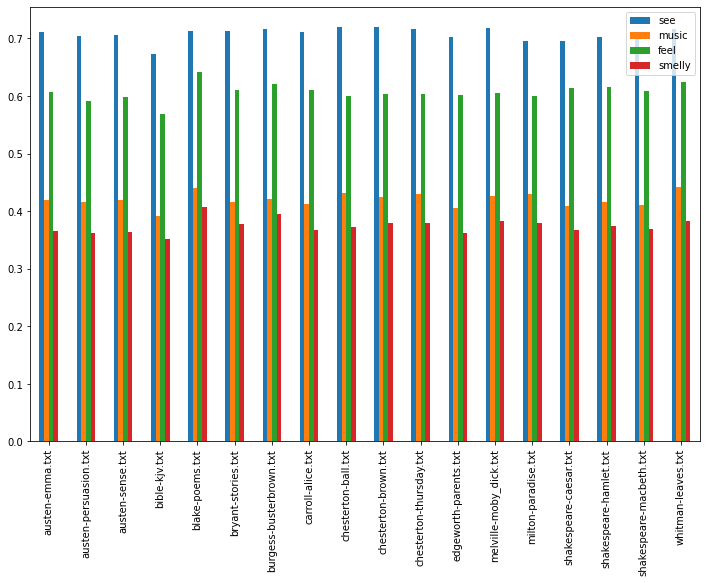

In [98]:
pd.DataFrame(senseSimilarities,index=gutenberg.fileids()).plot(kind='bar', figsize=(12,8))

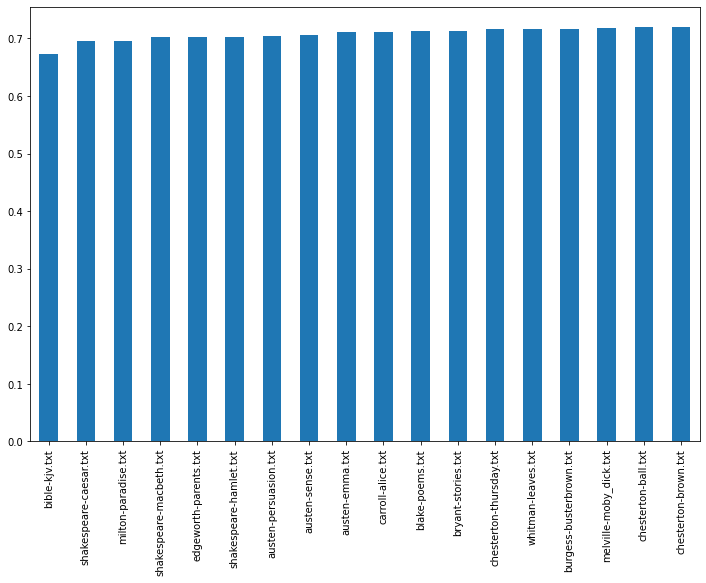

In [101]:
pd.DataFrame(senseSimilarities,index=gutenberg.fileids())["see"].sort_values().plot(kind='bar', figsize=(12,8))
# sort by value, bar chart

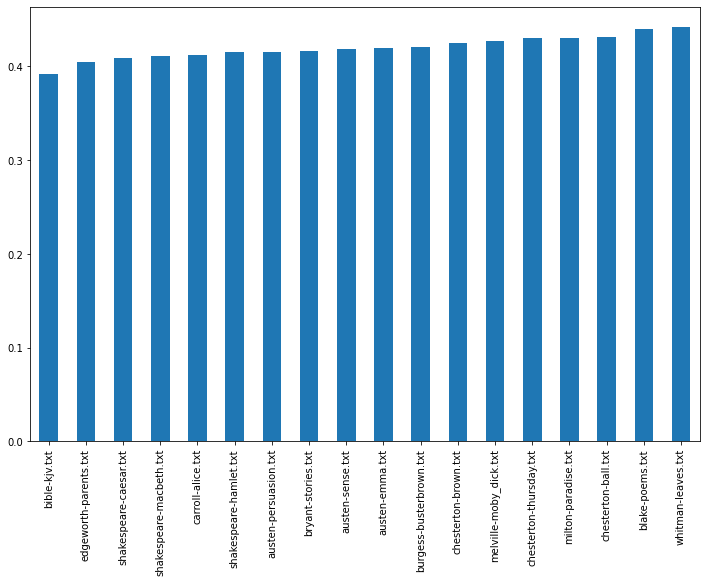

In [102]:
pd.DataFrame(senseSimilarities,index=gutenberg.fileids())["music"].sort_values().plot(kind='bar', figsize=(12,8))

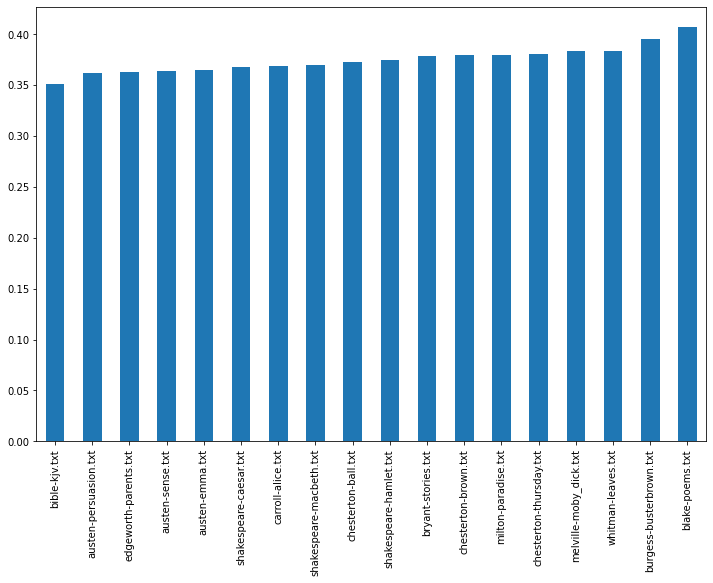

In [103]:
pd.DataFrame(senseSimilarities,index=gutenberg.fileids())["smelly"].sort_values().plot(kind='bar', figsize=(12,8))